In [98]:
import numpy as np
import pickle
import os

import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

%matplotlib inline

In [99]:
src_folder = "E:/DevData/rehab_exercise/shoulder_surgery/data/"
with open(src_folder+'processed.pkl', "rb") as file:
    data = pickle.load(file)

In [100]:
def get_theta2(thetas):
    avg = np.mean(thetas)    
    ix = thetas>avg
    count = len(thetas)
    
    total = 0
    segs = 0
    
    s = -1
    for i in range(count-1):
        if thetas[i]<=avg and thetas[i+1]>avg:
            s = i+1
        
        if thetas[i]>avg and thetas[i+1]<=avg and s>=0:
            e = i
            mx = np.amax(thetas[s:e+1])
            #print(mx)
            total += mx
            segs+=1
                                 
    return total/segs

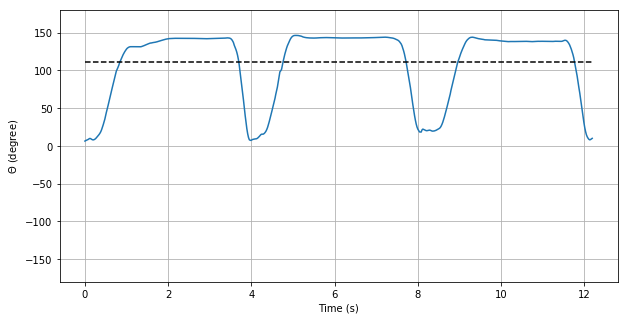

In [88]:
#Generate Figure for separation line
ex_no = 6
hand = 0 #0:right hand, 1 left hand

for i in range(8):
    if i!=6:
        continue
    
    d = data[i][hand]    
    a = data[i][2]
    if hand == 0:
        a = a[(a[:, 0]==ex_no) & (a[:, 1]!=2), :] 
    else:
        a = a[(a[:, 0]==ex_no) & (a[:, 1]>=2), :]
    
    fig = plt.figure(figsize=(10,5))
    subplot = fig.add_subplot(111)
    plt.ylim([-180, 180])
    plt.grid()
    
    for j in range(len(a)):
        if j!=1:
            continue
            
        t1 = a[j, -2]
        t2 = a[j, -1]
        flex = a[j, -3]
        ds = d[(d[:, 0]>=t1) & (d[:,0]<=t2), :]
        
        t = ds[:, 0] - ds[0, 0]
        x = np.arccos(ds[:, -3])*180/np.pi
        y = np.arccos(ds[:, -2])*180/np.pi
        z = np.arccos(ds[:, -1])*180/np.pi
        
        subplot.plot(t, x)
        avgx = np.mean(x)
        subplot.plot([0, t[-1]], [avgx, avgx], 'k--')
        
    #plt.title('subject: '+str(i+1)+', Ex No: '+str(ex_no)+', Hand: '+str(hand)+', Flexibility: '+str(flex))
    plt.legend()
    plt.xlabel('Time (s)')
    plt.ylabel(r"$\Theta$ (degree)")


[[ 138.32827981  149.07694407  153.5011562 ]
 [ 129.93906836  141.86189857  152.51323063]
 [ 128.9287256   144.28285679  154.3359759 ]
 [ 109.76030979  131.08620085  163.72968216]
 [ 116.44463717  130.43461653  147.6737945 ]
 [ 106.49979105  129.90181028  146.83538714]
 [ 113.39213897  144.67695408  153.76937225]
 [  89.73707619  111.54940504  141.16167259]]


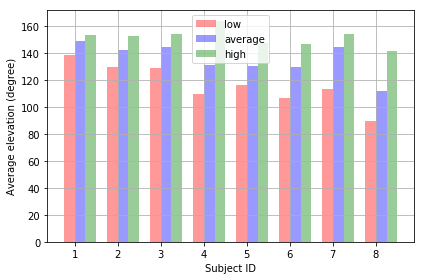

In [102]:
#Generate Figure for Right hand with respect to gravity
ex_no = 2
hand = 0 #0:right hand, 1 left hand

res = np.zeros((8,3))

for i in range(8):
    d = data[i][hand]    
    a = data[i][2]
    if hand == 0:
        a = a[(a[:, 0]==ex_no) & (a[:, 1]!=2), :] 
    else:
        a = a[(a[:, 0]==ex_no) & (a[:, 1]>=2), :]
    
    
    for j in range(3):
        t1 = a[j, -2]
        t2 = a[j, -1]
        flex = a[j, -3]
        ds = d[(d[:, 0]>=t1) & (d[:,0]<=t2), :]
        
        t = ds[:, 0] - ds[0, 0]
        x = np.arccos(ds[:, -3])*180/np.pi
        res[i, j] = get_theta2(x)
        
print(res)

n_groups = 8

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.4

rects1 = ax.bar(index, res[:, 0], bar_width,
                alpha=opacity, color='r',                
                label='low')

rects2 = ax.bar(index + bar_width, res[:, 1], bar_width,
                alpha=opacity, color='b',                
                label='average')

rects3 = ax.bar(index + 2*bar_width, res[:, 2], bar_width,
                alpha=opacity, color='g',                
                label='high')

ax.set_xlabel('Subject ID')
ax.set_ylabel("Average elevation (degree)")
#ax.set_title('')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('1', '2', '3', '4', '5', '6', '7', '8'))
ax.legend()

plt.grid()
fig.tight_layout()
plt.show()        
res1 = res        

[[ 132.47285875  143.37656225  148.38859359]
 [ 128.78475113  144.13150728  160.24366897]
 [ 127.95489851  140.51476672  149.57721618]
 [ 104.02059571  124.75068336  160.88247694]
 [ 111.27734081  126.22544882  140.27132355]
 [ 100.599435    122.53862112  141.73593543]
 [ 112.32948543  141.39315512  151.07810303]
 [  87.16919884  109.25172093  153.83921101]]


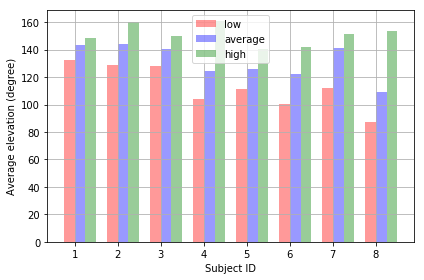

In [103]:
#Generate Figure for Left hand with respect to gravity
ex_no = 2
hand = 1 #0:right hand, 1 left hand

res = np.zeros((8,3))

for i in range(8):
    d = data[i][hand]    
    a = data[i][2]
    if hand == 0:
        a = a[(a[:, 0]==ex_no) & (a[:, 1]!=2), :] 
    else:
        a = a[(a[:, 0]==ex_no) & (a[:, 1]>=2), :]
    
    
    for j in range(3):
        t1 = a[j, -2]
        t2 = a[j, -1]
        flex = a[j, -3]
        ds = d[(d[:, 0]>=t1) & (d[:,0]<=t2), :]
        
        t = ds[:, 0] - ds[0, 0]
        x = np.arccos(ds[:, -3]*(-1))*180/np.pi
        res[i, j] = get_theta2(x)
        
print(res)

n_groups = 8

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.4

rects1 = ax.bar(index, res[:, 0], bar_width,
                alpha=opacity, color='r',                
                label='low')

rects2 = ax.bar(index + bar_width, res[:, 1], bar_width,
                alpha=opacity, color='b',                
                label='average')

rects3 = ax.bar(index + 2*bar_width, res[:, 2], bar_width,
                alpha=opacity, color='g',                
                label='high')

ax.set_xlabel('Subject ID')
ax.set_ylabel("Average elevation (degree)")
#ax.set_title('')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('1', '2', '3', '4', '5', '6', '7', '8'))
ax.legend()

plt.grid()
fig.tight_layout()
plt.show()        
res2 = res        

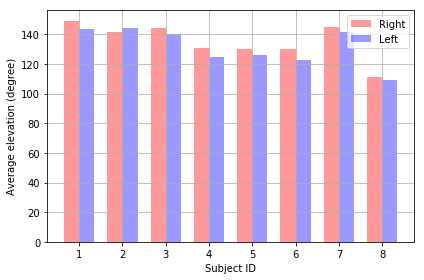

In [105]:
n_groups = 8

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4

rects1 = ax.bar(index, res1[:, 1], bar_width,
                alpha=opacity, color='r',                
                label='Right')

rects2 = ax.bar(index + bar_width, res2[:, 1], bar_width,
                alpha=opacity, color='b',                
                label='Left')


ax.set_xlabel('Subject ID')
ax.set_ylabel("Average elevation (degree)")
#ax.set_title('')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('1', '2', '3', '4', '5', '6', '7', '8'))
ax.legend()

plt.grid()
fig.tight_layout()
plt.show()        